In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
#inputfile = "input_test.txt"
inputfile = "input.txt"

In [66]:
with open(inputfile,'r') as f:
    iea = f.readline().replace('.','0').replace('#','1') #image enhancement algorithm

    f.readline() # skip one line

    imglines = f.read().replace('.','0').replace('#','1').splitlines()

In [67]:
iea

'10101000111001011000111111001110010001010101101101010100110010011100010010101010100001101100100001100010010111011101100011110001100001001001010111000101001100101000000010001110011110011001101101110010100011000101110100110011110100000001110001111010100001010101011011011110010010011001000000110000010010100100101101111111100000000010111011111000110100011110100101001000010110001101101011011000000111101110100110100111011001110101110001111110111111100010011000100000001110010111101011110101000000101010100010011100\n'

In [68]:
len(iea)

513

In [69]:
img=[]
for l0 in imglines:
    img0 = [int(char) for char in l0]
    img.append(img0)

In [70]:
img_np = np.array(img)
img_np

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [71]:
img_np.shape

(100, 100)

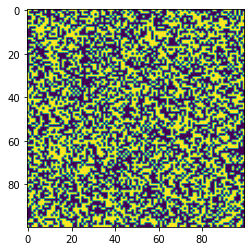

In [72]:
plt.imshow(img_np)

In [73]:
def boollist_to_int(x):
    y = 0
    size = len(x)
    for index,value in enumerate(x):
        y += value<< (size-1-index) #binary shift of value (1 or 0) by index times
    return int(y)

In [74]:
shape0 = img_np.shape
pad = 20
newshape = [ 2*pad+i for i in shape0] #Padding on all sides

img_np1 = np.zeros(newshape, dtype=np.int8)
img_np1[pad:-pad,pad:-pad] = img_np

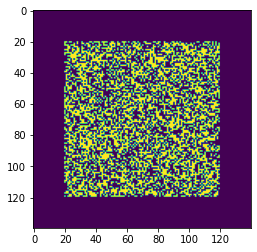

In [75]:
plt.imshow(img_np1)

In [76]:
def applyFilter5(img_np1):
    #Applies no padding
    img_res = np.zeros_like(img_np1)
    #Apply enhancement to all pixels
    for j in range(1, newshape[0]-1):
        for i in range(1 , newshape[1]-1):
            #Get the 3x3 elements around (j,i)
            code_arr = img_np1[j-1:j+2 , i-1:i+2]
            code_flat = code_arr.flatten()

            #Create the int from the flattened binary
            codevalue = boollist_to_int(code_flat)
            
            # get the new value from the translator
            newimgvalue = int(iea[codevalue])

            
            img_res[j,i] = newimgvalue #Replaces value

    return img_res

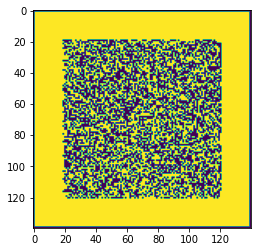

In [77]:
img1=applyFilter5(img_np1)
plt.imshow(img1)

In [82]:
img1[10,:]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int8)

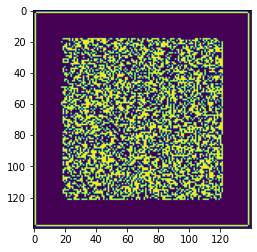

In [78]:
img2 = applyFilter5(img1)
plt.imshow(img2)

In [83]:
img2[10,:]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

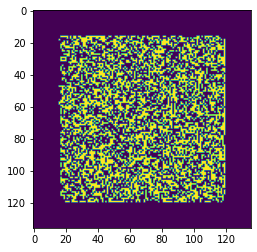

In [80]:
#Crop only middle
img2_crop = img2[2:-2,2:-2]
plt.imshow(img2_crop)

In [81]:
np.sum(img2_crop)

5268